CS 422: Homework 3
Jaken Whipp

In [1]:
import pandas as pd

Reading the data from a CSV file

In [4]:
dataFrame = pd.read_csv('../input/us-zip-codes/uszips.csv')

Verifying the data has been properly read

In [5]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33788 entries, 0 to 33787
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   zip               33788 non-null  int64  
 1   lat               33788 non-null  float64
 2   lng               33788 non-null  float64
 3   city              33788 non-null  object 
 4   state_id          33788 non-null  object 
 5   state_name        33788 non-null  object 
 6   zcta              33788 non-null  bool   
 7   parent_zcta       0 non-null      float64
 8   population        32714 non-null  float64
 9   density           32714 non-null  float64
 10  county_fips       33788 non-null  int64  
 11  county_name       33788 non-null  object 
 12  county_weights    33788 non-null  object 
 13  county_names_all  33788 non-null  object 
 14  county_fips_all   33788 non-null  object 
 15  imprecise         33788 non-null  bool   
 16  military          33788 non-null  bool  

Removing columns which I do not for the assignment.
Statement to drop columns was found at this link: https://www.geeksforgeeks.org/how-to-drop-one-or-multiple-columns-in-pandas-dataframe/

In [7]:
dataFrame.drop(dataFrame.iloc[:, 6:18], inplace=True, axis=1)

In [8]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33788 entries, 0 to 33787
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   zip         33788 non-null  int64  
 1   lat         33788 non-null  float64
 2   lng         33788 non-null  float64
 3   city        33788 non-null  object 
 4   state_id    33788 non-null  object 
 5   state_name  33788 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 1.5+ MB


Using value counts on state_name to find out what to remove during pre-processing. Based on the results Puerto Rico, Virgin Islands, Alaska, Hawaii, Guam, Northern Mariana Islands, and American Samoa should be removed from the dataset.

In [9]:
dataFrame.state_name.value_counts()

Texas                       1990
Pennsylvania                1833
New York                    1826
California                  1802
Illinois                    1396
Ohio                        1233
Missouri                    1035
Florida                     1011
Michigan                     992
Iowa                         970
Virginia                     903
Minnesota                    881
North Carolina               853
Indiana                      807
Wisconsin                    783
Kentucky                     780
Georgia                      751
West Virginia                738
Kansas                       704
Oklahoma                     664
Alabama                      656
Tennessee                    636
Arkansas                     615
Washington                   605
New Jersey                   598
Nebraska                     586
Louisiana                    539
Massachusetts                539
Colorado                     527
Maryland                     477
Mississipp

In [10]:
dataFrame = dataFrame[dataFrame.state_name != "Puerto Rico"]
dataFrame = dataFrame[dataFrame.state_name != "Virgin Islands"]
dataFrame = dataFrame[dataFrame.state_name != "Alaska"]
dataFrame = dataFrame[dataFrame.state_name != "Hawaii"]
dataFrame = dataFrame[dataFrame.state_name != "Guam"]
dataFrame = dataFrame[dataFrame.state_name != "Northern Mariana Islands"]
dataFrame = dataFrame[dataFrame.state_name != "American Samoa"]

In [11]:
dataFrame.state_name.value_counts()

Texas                   1990
Pennsylvania            1833
New York                1826
California              1802
Illinois                1396
Ohio                    1233
Missouri                1035
Florida                 1011
Michigan                 992
Iowa                     970
Virginia                 903
Minnesota                881
North Carolina           853
Indiana                  807
Wisconsin                783
Kentucky                 780
Georgia                  751
West Virginia            738
Kansas                   704
Oklahoma                 664
Alabama                  656
Tennessee                636
Arkansas                 615
Washington               605
New Jersey               598
Nebraska                 586
Massachusetts            539
Louisiana                539
Colorado                 527
Maryland                 477
Oregon                   427
Mississippi              427
Maine                    426
South Carolina           424
Arizona       

Dropping the rest of the columns so that the only remaining columns in the dataset are the zip code, latitude, and longitude.

In [12]:
dataFrame.drop(dataFrame.iloc[:, 3:6], inplace=True, axis=1)

In [13]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33297 entries, 138 to 33787
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   zip     33297 non-null  int64  
 1   lat     33297 non-null  float64
 2   lng     33297 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 1.0 MB


Dropping any rows with NA values as they would cause issues with the plotting.

In [14]:
dataFrame = dataFrame.dropna()

Creating the plot. Several others were created with varying point sizes after the initial plot.

<AxesSubplot:xlabel='lng', ylabel='lat'>

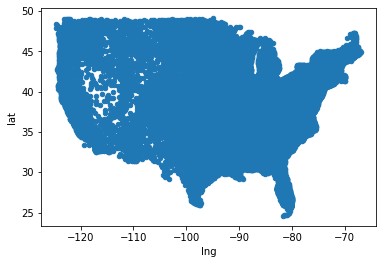

In [15]:
dataFrame.plot.scatter(x = "lng", y = "lat")

<AxesSubplot:xlabel='lng', ylabel='lat'>

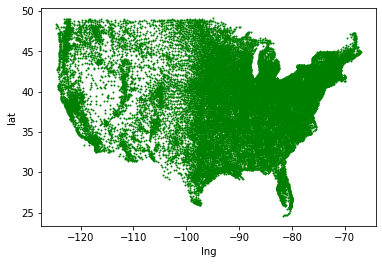

In [16]:
dataFrame.plot.scatter(x = "lng", y = "lat", s = 1, color = "green")

<AxesSubplot:xlabel='lng', ylabel='lat'>

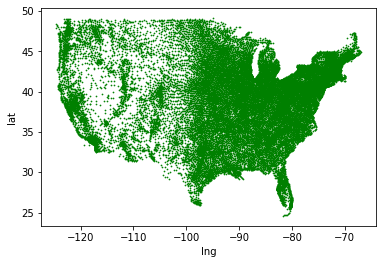

In [17]:
dataFrame.plot.scatter(x = "lng", y = "lat", s = 0.5, color = "green")

<AxesSubplot:xlabel='lng', ylabel='lat'>

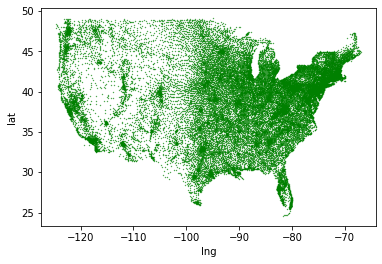

In [18]:
dataFrame.plot.scatter(x = "lng", y = "lat", s = 0.1, color = "green")

I did not put an image of the US map behind the plots as the points make the general shape of the United States regardless.